<a href="https://colab.research.google.com/github/banatehrani/TensorFlow-and-Neural-Networks/blob/main/TensorFlow_and_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The codes here are a summary and partially modified version of the codes taught in the ZTM tensorflow course.

# **Binary Classification**

## **Data Preparation & Visualization**

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-01-21 03:27:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 209.85.146.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  96.8MB/s    in 1.1s    

2023-01-21 03:27:58 (96.8 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# Another way to find out how many images are in a folder
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (384, 512, 3)


array([[[ 41,  38,  33],
        [ 43,  40,  35],
        [ 45,  42,  37],
        ...,
        [ 41,  32,  27],
        [ 43,  34,  29],
        [ 45,  36,  31]],

       [[ 40,  37,  32],
        [ 42,  39,  34],
        [ 45,  40,  36],
        ...,
        [ 42,  33,  28],
        [ 42,  33,  28],
        [ 42,  33,  28]],

       [[ 41,  38,  33],
        [ 44,  39,  35],
        [ 45,  40,  36],
        ...,
        [ 43,  34,  27],
        [ 41,  32,  25],
        [ 40,  31,  24]],

       ...,

       [[225,  94,  86],
        [229,  98,  90],
        [231, 103,  94],
        ...,
        [130, 100,  92],
        [131, 101,  93],
        [125,  95,  87]],

       [[221,  94,  85],
        [225,  99,  87],
        [227, 103,  91],
        ...,
        [130, 100,  92],
        [131, 101,  93],
        [128,  98,  90]],

       [[221,  97,  85],
        [221,  99,  86],
        [222, 100,  87],
        ...,
        [135, 105,  97],
        [131, 101,  93],
        [130, 100,  92]]

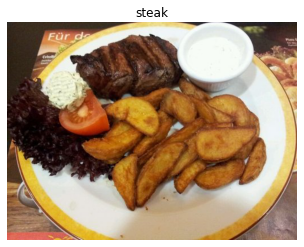

In [ ]:
# View a random image from the training dataset and show the actual data
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

img

## **Model 1: Wihout Data Augmentation**

### **Data Generation**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
images[0].shape

(224, 224, 3)

In [ ]:
# Check lengths of training and test data generators (number of batches)
len(train_data), len(test_data)

(47, 16)

### **Model Creation**

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = Sequential([
    Conv2D(filters=10, 
           kernel_size=3, # can also be (3, 3)
           strides=1,
           activation="relu", # Can be written in a separate line
           input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                              padding="valid"), # padding can also be 'same'
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 177ms/step - loss: 0.5937 - accuracy: 0.6793 - val_loss: 0.4253 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 8s 168ms/step - loss: 0.4288 - accuracy: 0.8067 - val_loss: 0.3627 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 8s 169ms/step - loss: 0.4074 - accuracy: 0.8220 - val_loss: 0.3165 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 8s 170ms/step - loss: 0.3434 - accuracy: 0.8513 - val_loss: 0.2797 - val_accuracy: 0.8900
Epoch 5/5
47/47 [==============================] - 8s 169ms/step - loss: 0.2997 - accuracy: 0.8813 - val_loss: 0.2740 - val_accuracy: 0.8900


### **Model Evaluation**

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

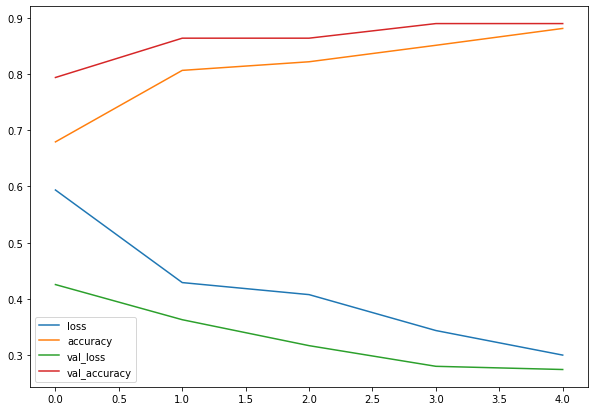

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(1, len(history.history['loss'])+1)

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

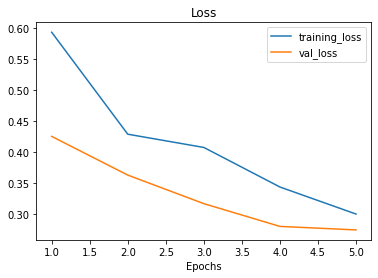

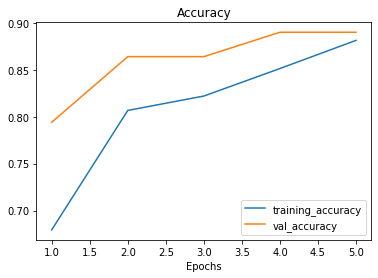

In [ ]:
# Check out the loss curves of model_1
plot_loss_curves(history_1)

## **Model 2: With Data Augmentation**

### **Data Generation and Augmentation**

In [ ]:
################################################################################
"""New Section in Model 2"""####################################################
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis
"""End of New Section in Model 2"""#############################################
################################################################################                                   

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary') 

# Create non-augmented test data batches
print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of the training data batch 
images, labels = train_data_augmented.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
images[0].shape

(224, 224, 3)

In [ ]:
# Check lengths of training and test data generators (number of batches)
len(train_data_augmented), len(test_data)

(47, 16)

### **Model Creation**

In [ ]:
# Clone the model (use the same architecture)
model_2 = tf.keras.models.clone_model(model_1)

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6204 - accuracy: 0.6513 - val_loss: 0.4578 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 21s 455ms/step - loss: 0.5267 - accuracy: 0.7460 - val_loss: 0.3983 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 21s 455ms/step - loss: 0.4825 - accuracy: 0.7667 - val_loss: 0.3522 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 22s 458ms/step - loss: 0.4656 - accuracy: 0.7780 - val_loss: 0.3215 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 21s 457ms/step - loss: 0.4655 - accuracy: 0.7793 - val_loss: 0.3111 - val_accuracy: 0.8720


### **Model Evaluation and Prediction**

In [ ]:
model_2.evaluate(test_data)

16/16 [==============================] - 2s 124ms/step - loss: 0.3111 - accuracy: 0.8720


[0.31107470393180847, 0.871999979019165]

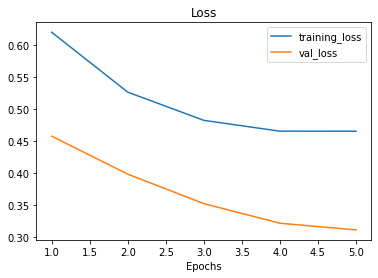

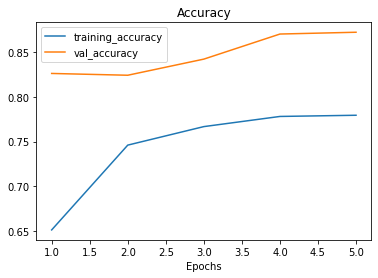

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_2)

(512, 512, 3)


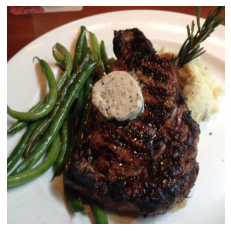

In [ ]:
steak = mpimg.imread("/content/pizza_steak/test/steak/1687010.jpg")
plt.imshow(steak)
plt.axis(False);
print(steak.shape)

In [ ]:
# To make predictions on test data it has to be in the same form that your model has been trained on.
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor
    and reshapes it to (img_shape, img_shape, colour_channel).
    """
    # Read in target file (an image)
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor & ensure 3 colour channels 
    # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
    img = tf.image.decode_image(img, channels=3)

    # Resize the image (to the same size our model was trained on)
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [ ]:
steak = load_and_prep_image("/content/pizza_steak/test/steak/1687010.jpg")
steak = tf.expand_dims(steak, axis=0)
steak.shape

TensorShape([1, 224, 224, 3])

In [ ]:
pred = model_2.predict(steak)
pred

1/1 [==============================] - 0s 128ms/step


array([[0.9961612]], dtype=float32)

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    if len(pred[0]) > 1: # check for multi-class
        pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 18ms/step


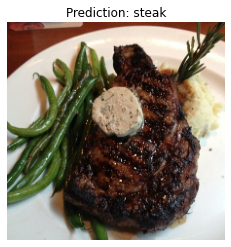

In [ ]:
pred_and_plot(model_2, 
              "/content/pizza_steak/test/steak/1687010.jpg",
              class_names)

# **Multiclass Classification**

## **Data Preparation**

In [ ]:
# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-01-21 03:30:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 142.250.159.128, 142.251.161.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   267MB/s    in 1.9s    

2023-01-21 03:30:42 (267 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get the class names for our multi-class dataset
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Set the seed
tf.random.set_seed(42)

# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

print("Augmented trained images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

# Create non-augmented test data batches
print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Augmented trained images:
Found 7500 images belonging to 10 classes.
Unchanged test images:
Found 2500 images belonging to 10 classes.


## **Model Creation**

In [ ]:
# Create a model
model_3 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_3.compile(loss="categorical_crossentropy", 
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data)) 

Epoch 1/5
235/235 [==============================] - 107s 455ms/step - loss: 2.1730 - accuracy: 0.2036 - val_loss: 1.9865 - val_accuracy: 0.2828
Epoch 2/5
235/235 [==============================] - 106s 453ms/step - loss: 2.0625 - accuracy: 0.2677 - val_loss: 1.9222 - val_accuracy: 0.3216
Epoch 3/5
235/235 [==============================] - 106s 452ms/step - loss: 2.0407 - accuracy: 0.2776 - val_loss: 1.9552 - val_accuracy: 0.3344
Epoch 4/5
235/235 [==============================] - 106s 453ms/step - loss: 2.0176 - accuracy: 0.2931 - val_loss: 1.8662 - val_accuracy: 0.3472
Epoch 5/5
235/235 [==============================] - 106s 452ms/step - loss: 1.9767 - accuracy: 0.3059 - val_loss: 1.8363 - val_accuracy: 0.3636


## **Model Evaluation and Prediction**

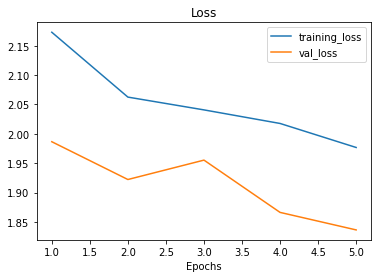

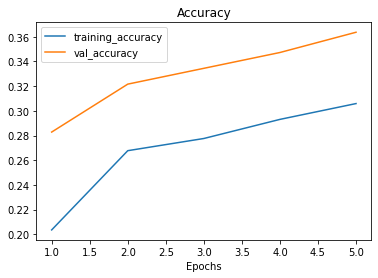

In [ ]:
# Check out the loss curves of model_3
plot_loss_curves(history_3)

1/1 [==============================] - 0s 62ms/step


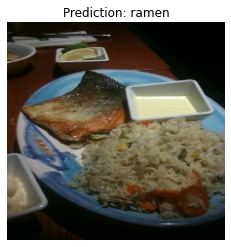

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_3, 
              filename="/content/10_food_classes_all_data/test/grilled_salmon/146777.jpg", 
              class_names=class_names)

## **Saving and Loading Model**

In [ ]:
# Save a model
model_3.save("saved_trained_model")

In [ ]:
# Load in a model and evaluate it
loaded_model_3 = tf.keras.models.load_model("saved_trained_model")
loaded_model_3.evaluate(test_data)

79/79 [==============================] - 10s 124ms/step - loss: 1.8363 - accuracy: 0.3636


[1.8363186120986938, 0.3635999858379364]

In [ ]:
# Compare our unsaved model's results (same as above)
model_3.evaluate(test_data)

79/79 [==============================] - 10s 124ms/step - loss: 1.8363 - accuracy: 0.3636


[1.8363183736801147, 0.3635999858379364]